In [2]:
#preprocess step

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")


# FEATURE SELECTION
df = df[['Company','Date','Close/Last','Volume','Open','High','Low']]



#REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)



# ELECT NUMERIC COLUMN
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
df_columns = df_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

#CONCATINATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)




# FILL MISSING IN TRAIN DATASET
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns



#FILL MISSING IN TEST DATASET
df.fillna(df.mean(), inplace=True)   # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns



# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')


# NORMALIZE AND SCALING 
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])


print(df)



         Volume  Company  Date  Close/Last   Open   High    Low
0      0.046403        0  1353        6244   6066   6196   6187
1      0.038036        0  1333        6177   6024   6135   5939
2      0.037778        0  1325        6173   6029   6136   5943
3      0.056018        0  1317        5967   5838   6149   5920
4      0.042755        0  1310        5913   5826   5900   5876
...         ...      ...   ...         ...    ...    ...    ...
25155  0.030310        6  1397       10836  10806  11176  10775
25156  0.071094        6  1390       11067  10842  11468  10965
25157  0.041019        6  1382       11512  11407  11695  11294
25158  0.015934        6  1361       11572  11420  11678  11517
25159  0.018114        6  1354       11682  11501  11746  11529

[25160 rows x 7 columns]


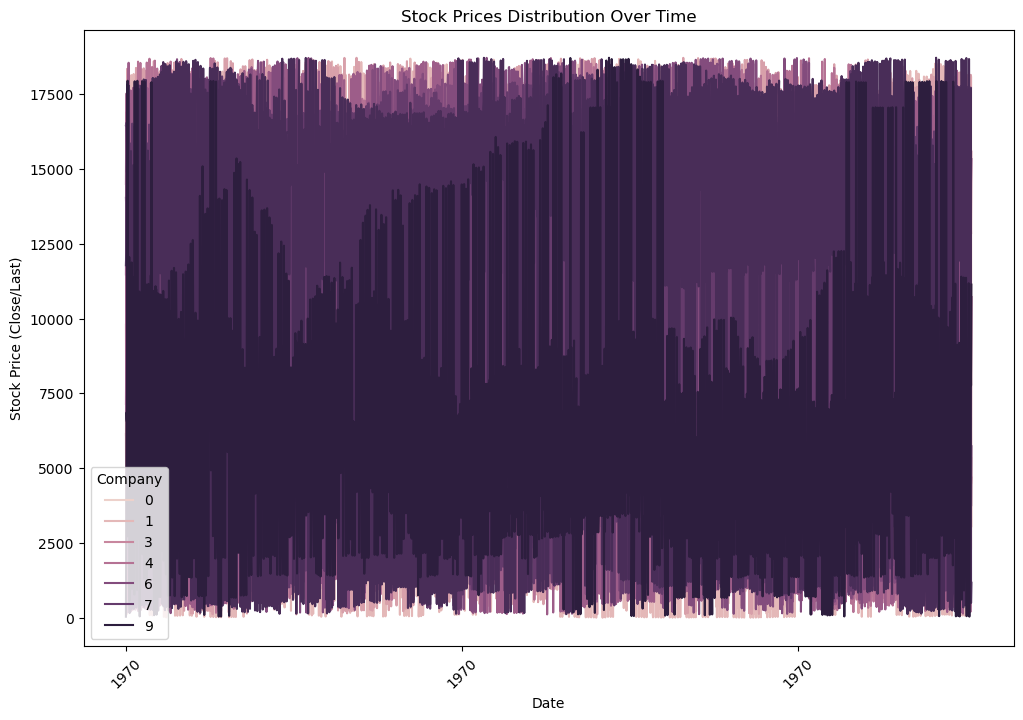

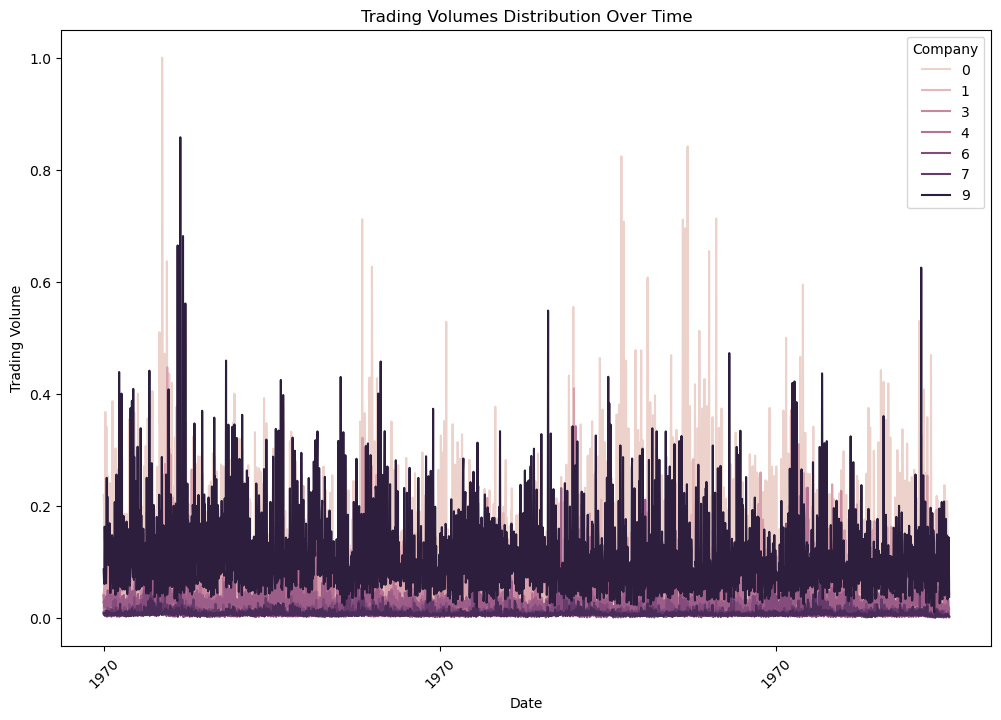

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company','Date','Close/Last','Volume','Open','High','Low']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# ELECT NUMERIC COLUMN
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
df_columns = df_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING 
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

# ANALYZE DISTRIBUTION OF STOCK PRICES AND VOLUMES FOR EACH COMPANY OVER TIME

#CONVERT DATE COLUMN TO DATETIME TYPE
df['Date'] = pd.to_datetime(df['Date'])

# GROUP BY  'Company' and 'Date' AND CALCULATE THE MEAN OF 'Close/Last' AND 'Volume' FOR EACH GROUP
grouped_df = df.groupby(['Company', 'Date']).agg({'Close/Last': 'mean', 'Volume': 'mean'}).reset_index()

# PLOT THE DISTRIBUTION OF STOCK PRICES OVER TIME FOR EACH COMPANY
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Close/Last', hue='Company', data=grouped_df)
plt.title('Stock Prices Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close/Last)')
plt.xticks(rotation=45)
plt.show()

# PLOT THE DISTRIBUTION OF TRADING VOLUME  OVER THE TIME FOR EACH COMPANY
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Volume', hue='Company', data=grouped_df)
plt.title('Trading Volumes Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.xticks(rotation=45)
plt.show()


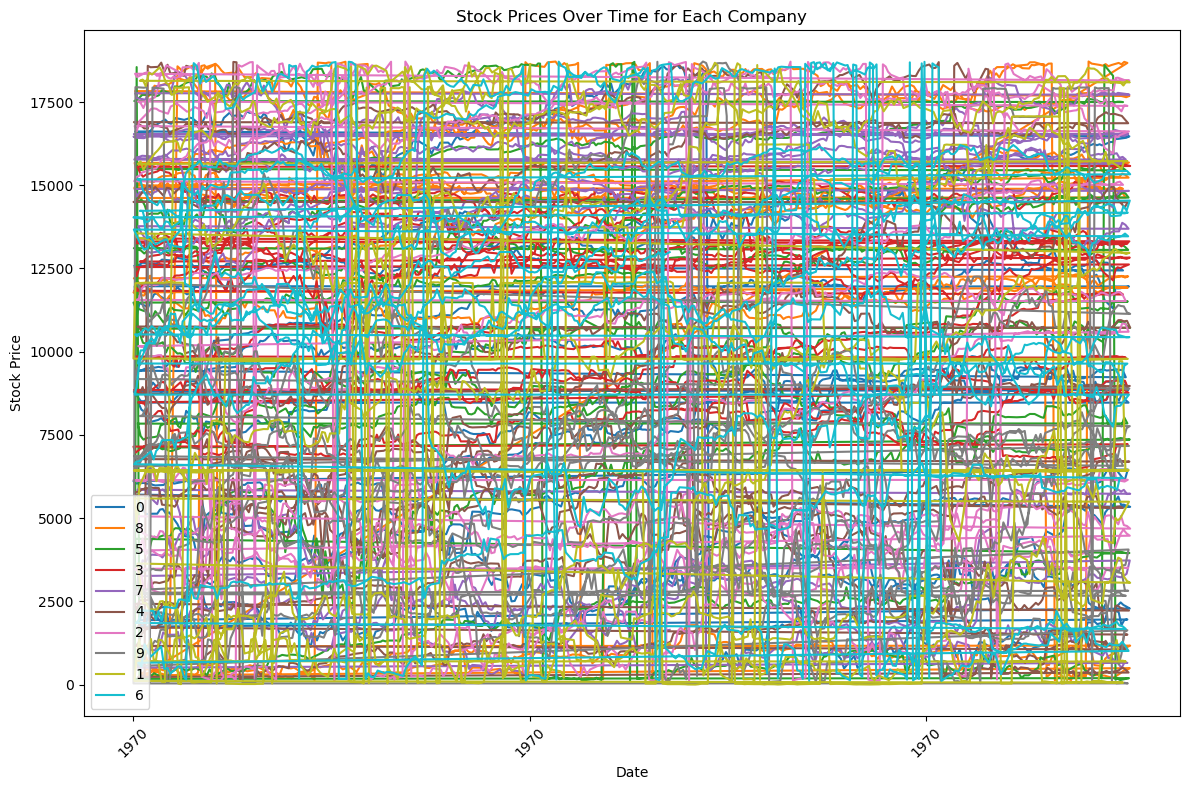

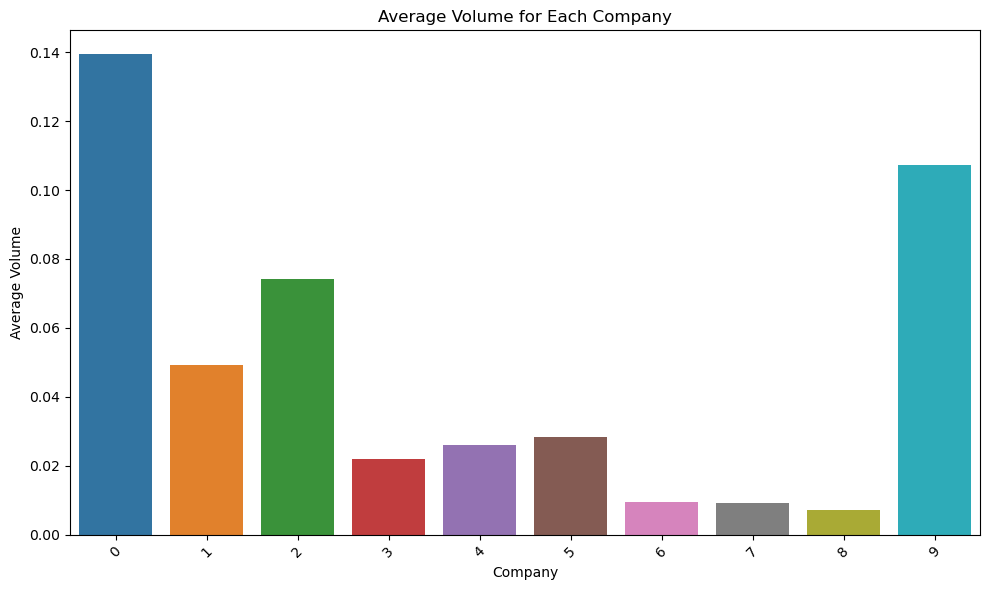

C:\Users\nh013\AppData\Local\Temp\ipykernel_1540\1629769969.py:92: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



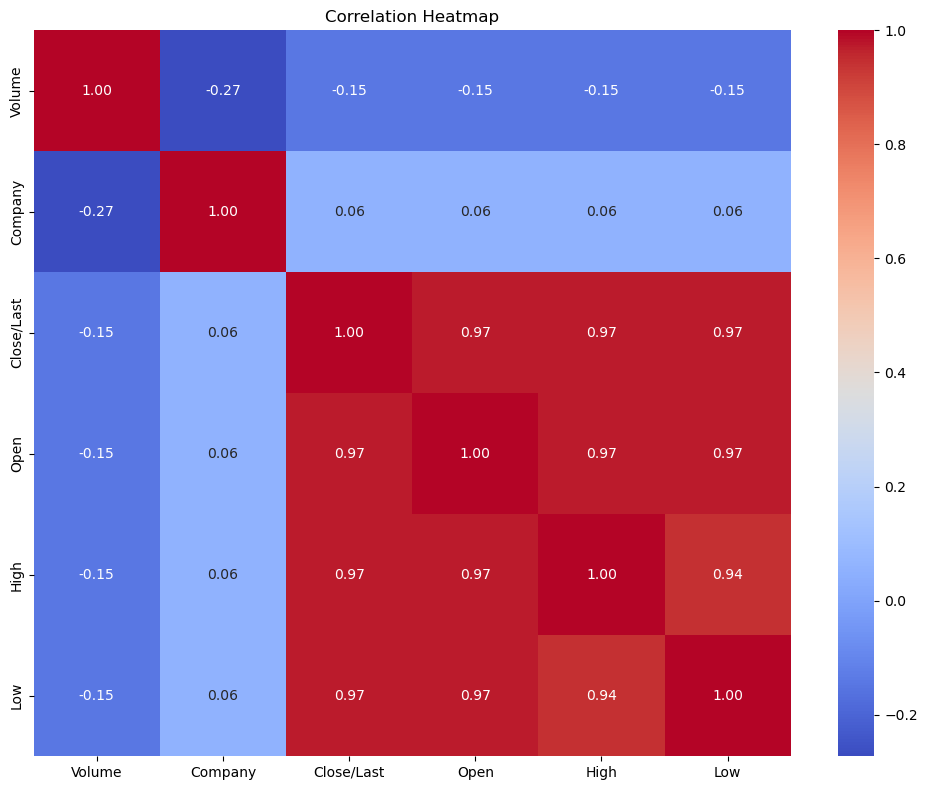

In [12]:
#EDA analysis
#Visualize trends, seasonality, and patterns in the stock market data using line charts, bar plots, and heatmaps.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# Data Preprocessing

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# ELECT NUMERIC COLUMN
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
df_numeric_columns = df_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])



#CONVERT THE DATE COLUMN TO DATETIME TYPE
df['Date'] = pd.to_datetime(df['Date'])

# LINE CHART FOR  STOCK PRICE OVER TIME FOR EACH COMPANY
fig, ax = plt.subplots(figsize=(12, 8))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    ax.plot(company_data['Date'], company_data['Close/Last'], label=company)

ax.set_title('Stock Prices Over Time for Each Company')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# BAR PLOT FOR AVERAGE VOLUME FOR EACH COMPANY
fig, ax = plt.subplots(figsize=(10, 6))
average_volume = df.groupby('Company')['Volume'].mean().reset_index()
sns.barplot(x='Company', y='Volume', data=average_volume, ax=ax)
ax.set_title('Average Volume for Each Company')
ax.set_xlabel('Company')
ax.set_ylabel('Average Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# HEATMAP TO VISUALIZE CORRELATION BETWEEN NUMERIC FEATURES
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
ax.set_title('Correlation Heatmap')
plt.tight_layout()
plt.show()


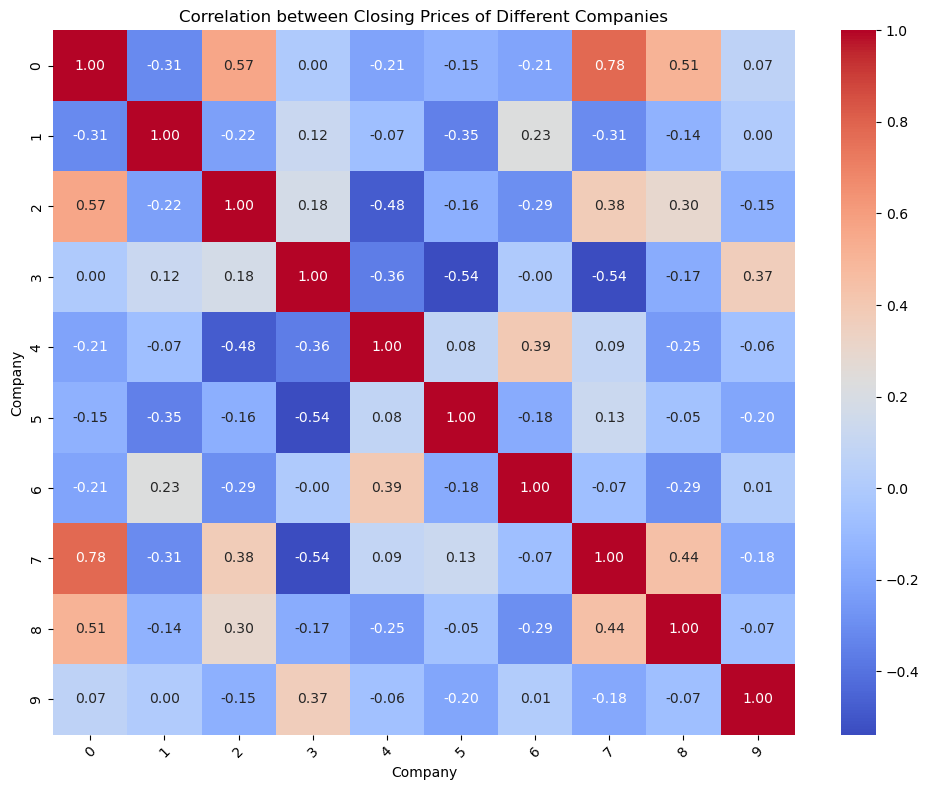

In [13]:
#correlation analysis
#Investigate the correlations between the closing prices of different companies to identify potential relationships.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# Data Preprocessing

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# ELECT NUMERIC COLUMN
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
df_numeric_columns = df_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])



# CALCULATE THE CORRELATION MATRICS BETWEEN CLOSING PRICE OF DIFFERENT COMPANIES
correlation_matrix = df.pivot_table(index='Date', columns='Company', values='Close/Last').corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Closing Prices of Different Companies')
plt.xlabel('Company')
plt.ylabel('Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


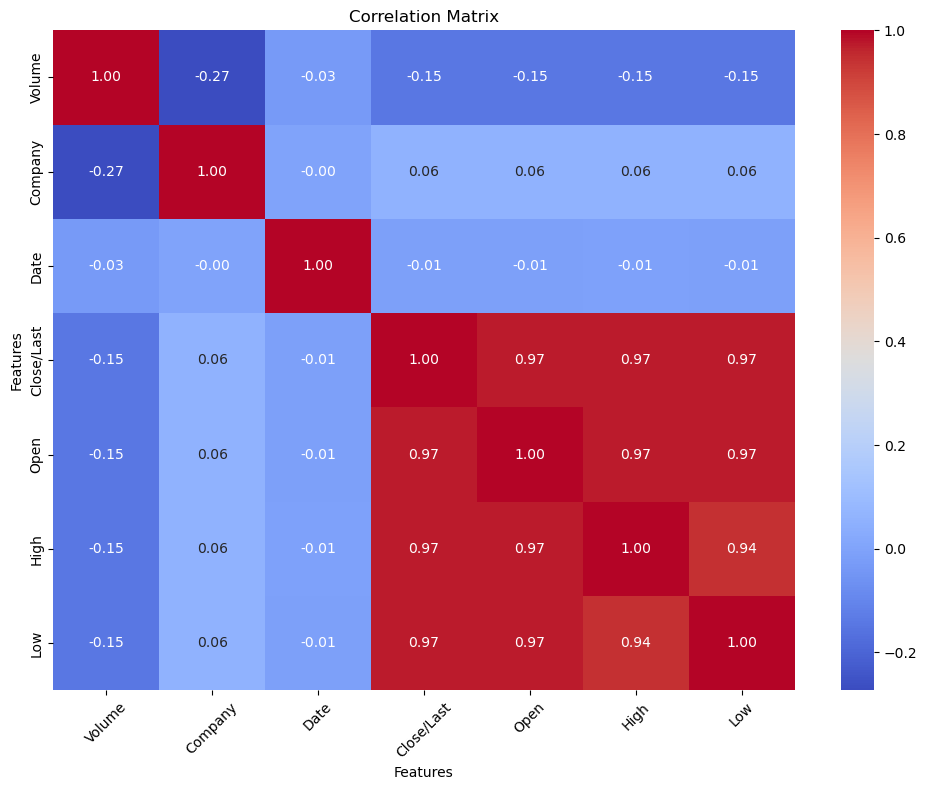

In [14]:
#correlation analysis

#Calculate correlation coefficients and visualize correlation matrices.

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# Data Preprocessing

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# ELECT NUMERIC COLUMN
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
df_numeric_columns = df_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

# CALCULATE CORRELATION  COEFFICIENT
correlation_matrix = df.corr()

# HEATMAP TO VISUALIZE THE CORRELATION MATRICS
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
#Top Performers Identification:
#Identify the top-performing companies based on their stock price growth and trading volumes over a specific time period.

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# Data Preprocessing

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# ELECT NUMERIC COLUMN
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
df_numeric_columns = df_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

# CALCULATE A COMBINED METRIC fFOR TOP PERFORMING COMPANIES
df['CombinedMetric'] = df['Close/Last'] + df['Volume']

# GROUP THE DATA BY  'Company' AND CALCULATE THE MEAN OF THE COMBINED METRIC FOR EACH GROUP
top_performing_companies = df.groupby('Company')['CombinedMetric'].mean().reset_index()

# SORT THE COMPANIES BASED OF THR COMBINED METRIC IN DESCENDING ORDER
top_performing_companies = top_performing_companies.sort_values(by='CombinedMetric', ascending=False)


print("Top-Performing Companies:")
print(top_performing_companies)


Top-Performing Companies:
   Company  CombinedMetric
8        8    12873.012730
7        7    11795.875093
3        3    11402.075908
6        6    10972.096524
5        5    10096.644244
2        2     9170.095233
1        1     9054.969234
0        0     8578.640168
4        4     8001.384416
9        9     6095.609217


In [22]:
#pefrom time-basesd feature engineering.....

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# CONVERT 'Date' COLUMN TO DATETIME TYPE
df['Date'] = pd.to_datetime(df['Date'])

# TIME-BASED FEATURE ENGINEERING
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Quarter'] = df['Date'].dt.quarter

# SELECT NUMERIC COLUMNS
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMNS TO FLOAT
df_columns = df_numeric_columns.astype(float)

# SELECT CATEGORICAL COLUMNS
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING IN TRAIN DATASET
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

print(df)


         Volume  Year     Month       Day  Weekday   Quarter  Company  \
0      0.046403   1.0  0.545455  0.533333     0.00  0.666667        0   
1      0.038036   1.0  0.545455  0.433333     1.00  0.666667        0   
2      0.037778   1.0  0.545455  0.400000     0.75  0.666667        0   
3      0.056018   1.0  0.545455  0.366667     0.50  0.666667        0   
4      0.042755   1.0  0.545455  0.333333     0.25  0.666667        0   
...         ...   ...       ...       ...      ...       ...      ...   
25155  0.030310   0.0  0.545455  0.766667     0.50  0.666667        6   
25156  0.071094   0.0  0.545455  0.733333     0.25  0.666667        6   
25157  0.041019   0.0  0.545455  0.700000     0.00  0.666667        6   
25158  0.015934   0.0  0.545455  0.600000     1.00  0.666667        6   
25159  0.018114   0.0  0.545455  0.566667     0.75  0.666667        6   

       Close/Last   Open   High    Low  
0            6244   6066   6196   6187  
1            6177   6024   6135   5939  


In [23]:
#perform lag feature engineering

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# CONVERT 'Date' COLUMN TO DATETIME TYPE
df['Date'] = pd.to_datetime(df['Date'])

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# ELECT NUMERIC COLUMNS
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMNS TO FLOAT
df_numeric_columns = df_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMNS
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# LAG FEATURE ENGINEERING

for column in df_numeric_columns.columns:
    for lag in range(1, num_lags + 1):
        df[f"{column}_lag{lag}"] = df[column].shift(lag)

# FILL MISSING VALUES
df.fillna(df.mean(), inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

print(df)


         Volume  Company  Close/Last   Open   High    Low   Volume_lag1  \
0      0.046403        0        6244   6066   6196   6187  5.131887e+07   
1      0.038036        0        6177   6024   6135   5939  5.052016e+07   
2      0.037778        0        6173   6029   6136   5943  4.161624e+07   
3      0.056018        0        5967   5838   6149   5920  4.134234e+07   
4      0.042755        0        5913   5826   5900   5876  6.075025e+07   
...         ...      ...         ...    ...    ...    ...           ...   
25155  0.030310        6       10836  10806  11176  10775  1.963232e+07   
25156  0.071094        6       11067  10842  11468  10965  3.339535e+07   
25157  0.041019        6       11512  11407  11695  11294  7.679296e+07   
25158  0.015934        6       11572  11420  11678  11517  4.479110e+07   
25159  0.018114        6       11682  11501  11746  11529  1.809875e+07   

        Volume_lag2   Volume_lag3  
0      5.132019e+07  5.132045e+07  
1      5.132019e+07  5.1320

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# CONVERT 'Date' COLUMN TO DATETIME TYPE
df['Date'] = pd.to_datetime(df['Date'])

# TIME-BASED FEATURE ENGINEERING
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Quarter'] = df['Date'].dt.quarter

# SELECT NUMERIC COLUMNS
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMNS TO FLOAT
df_columns = df_numeric_columns.astype(float)

# SELECT CATEGORICAL COLUMNS
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING IN TRAIN DATASET
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

# SPLIT DATA INTO  X (predictor variables) and y (target variable)
X = df.drop('Close/Last', axis=1)
y = df['Close/Last']

# SPLIT DATA INTO TRAING AND TESTING SET (70% and 30% respectively)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)


         Volume  Year     Month       Day  Weekday   Quarter  Company   Open  \
20770  0.023353   0.7  1.000000  0.733333     0.50  1.000000        1  17831   
11285  0.010198   0.5  0.727273  0.166667     0.75  0.666667        7  15962   
12680  0.031435   1.0  0.090909  0.666667     0.25  0.000000        4   5126   
23720  0.002589   0.6  0.272727  0.133333     1.00  0.333333        6  11181   
9761   0.025904   0.1  0.727273  0.933333     0.00  0.666667        3   7814   
...         ...   ...       ...       ...      ...       ...      ...    ...   
21575  0.064261   0.4  0.818182  0.366667     0.75  1.000000        1   2115   
5390   0.028326   0.9  0.090909  0.266667     0.50  0.000000        5   9844   
860    0.087968   0.7  0.090909  0.400000     0.75  0.000000        0  16807   
15795  0.104428   0.7  0.818182  0.033333     1.00  1.000000        2   3927   
23654  0.003000   0.6  0.545455  0.333333     0.75  0.666667        6  11568   

        High    Low  
20770  18518  184

In [1]:
#PERFORM SVR MODEL 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# CONVERT 'Date' COLUMN TO DATETIME TYPE
df['Date'] = pd.to_datetime(df['Date'])

# TIME-BASED FEATURE ENGINEERING
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Quarter'] = df['Date'].dt.quarter

# SELECT NUMERIC COLUMNS
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMNS TO FLOAT
df_columns = df_numeric_columns.astype(float)

# SELECT CATEGORICAL COLUMNS
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING IN TRAIN DATASET
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

# SPLIT DATA INTO X AND Y  
X = df.drop('Close/Last', axis=1)
y = df['Close/Last']

# SPLIT DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVR MODEL
svr_model = SVR(kernel='linear')  # You can choose other kernels like 'rbf', 'poly', etc.
svr_model.fit(X_train, y_train)

#PREDICTIONS
y_pred = svr_model.predict(X_test)

#EVALUATE 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 993017.6968883604
R-squared: 0.966756263878253


In [2]:
#PERFORM XGBOOST MODEL

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# CONVERT 'Date' COLUMN TO DATETIME TYPE
df['Date'] = pd.to_datetime(df['Date'])

# TIME-BASED FEATURE ENGINEERING
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Quarter'] = df['Date'].dt.quarter

# SELECT NUMERIC COLUMNS
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMNS TO FLOAT
df_columns = df_numeric_columns.astype(float)

# SELECT CATEGORICAL COLUMNS
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING IN TRAIN DATASET
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

# Split data into X (predictor variables) and y (target variable)
X = df.drop('Close/Last', axis=1)
y = df['Close/Last']

# Split data into train and test sets (70% and 30% respectively)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # You can set other parameters for tuning
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 721090.3928066639
R-squared: 0.9758597064145911


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# CONVERT 'Date' COLUMN TO DATETIME TYPE
df['Date'] = pd.to_datetime(df['Date'])

# TIME-BASED FEATURE ENGINEERING
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Quarter'] = df['Date'].dt.quarter

# SELECT NUMERIC COLUMNS
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMNS TO FLOAT
df_columns = df_numeric_columns.astype(float)

# SELECT CATEGORICAL COLUMNS
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING IN TRAIN DATASET
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

#SPLIT DATA INTO X AND Y
X = df.drop('Close/Last', axis=1)
y = df['Close/Last']

# SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#RESHAPE THE DATA FOR LSTM INPUT
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

# LSTM MODEL
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# TRAIN THE MODEL
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# PREDICTIONS
y_pred = model.predict(X_test)

# RESHAPE PREDICTIONS TO MATCH THE ORGINAL SHAPE
y_pred = y_pred.flatten()

# EVALUATE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Epoch 1/50
551/551 [==============================] - 7s 4ms/step - loss: 124350352.0000
Epoch 2/50
551/551 [==============================] - 2s 3ms/step - loss: 123976736.0000
Epoch 3/50
551/551 [==============================] - 2s 3ms/step - loss: 123645816.0000
Epoch 4/50
551/551 [==============================] - 2s 3ms/step - loss: 123329320.0000
Epoch 5/50
551/551 [==============================] - 2s 3ms/step - loss: 123003328.0000
Epoch 6/50
551/551 [==============================] - 2s 4ms/step - loss: 122682328.0000
Epoch 7/50
551/551 [==============================] - 2s 4ms/step - loss: 122365080.0000
Epoch 8/50
551/551 [==============================] - 2s 4ms/step - loss: 122049392.0000
Epoch 9/50
551/551 [==============================] - 2s 4ms/step - loss: 121735472.0000
Epoch 10/50
551/551 [==============================] - 2s 3ms/step - loss: 121422840.0000
Epoch 11/50
551/551 [==============================] - 2s 3ms/step - loss: 121110336.0000
Epoch 12/50
551/551

In [1]:
#PERFORM RANDOMFOREST MODEL

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
df = pd.read_csv(r"C:\Users\nh013\Desktop\Stock Market Historical Data of Top 10 Companies\data.csv")

# FEATURE SELECTION
df = df[['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# CONVERT 'Date' COLUMN TO DATETIME TYPE
df['Date'] = pd.to_datetime(df['Date'])

# TIME-BASED FEATURE ENGINEERING
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Quarter'] = df['Date'].dt.quarter

# SELECT NUMERIC COLUMNS
df_numeric_columns = df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMNS TO FLOAT
df_columns = df_numeric_columns.astype(float)

# SELECT CATEGORICAL COLUMNS
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING IN TRAIN DATASET
df.fillna(df.mean(), inplace=True)  # Mean for numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

# HANDLE OUTLIERS
df = handle_outliers(df, 'Company')

# NORMALIZE AND SCALING
scaler = MinMaxScaler()
df[df_numeric_columns.columns] = scaler.fit_transform(df[df_numeric_columns.columns])

# SPLIT THE DATA X AND Y
X = df.drop('Close/Last', axis=1)
y = df['Close/Last']

# SPLIT DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RANDOMFOREST MODEL
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)

#PREDICTIONS
y_pred = rf_model.predict(X_test)

#EVALUATE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 655238.347349417
R-squared: 0.9780642673495249
